In [18]:
import pandas as pd
import numpy as np

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Import des données des dataframes
df1=pd.read_csv('../data/world-happiness-report.csv')
df2_full=pd.read_csv('../data/world-happiness-report-2021.csv')
df3_full=pd.read_excel('../data/data2022.xlsx')
display(df1.head(1))
display(df2_full.head(1))
display(df3_full.head(1))

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576


In [25]:
# Harmonisation par suppression des colonnes n'existant que dans le rapport 2021.
df2=df2_full.drop(['Regional indicator','Standard error of ladder score','upperwhisker',
                   'lowerwhisker','Ladder score in Dystopia','Explained by: Log GDP per capita',
                   'Explained by: Social support','Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices','Explained by: Generosity',
                   'Explained by: Perceptions of corruption','Dystopia + residual'],axis=1)

# Ajout de la colonne "year" sur le df2021 pour pouvoir le concatener avec le df1
df2.insert(loc=1,column='year',value=2021)

In [26]:
# Renommage des colonnes du df2021
df2=df2.rename(columns={'Ladder score':'Life Ladder','Logged GDP per capita':'Log GDP per capita',
                        'Healthy life expectancy':'Healthy life expectancy at birth'})

# Réindexation du df2021 par rapport au df1
df2.index=df2.index+1950
df2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1950,Finland,2021,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1951,Denmark,2021,7.620,10.933,0.954,72.7,0.946,0.030,0.179
1952,Switzerland,2021,7.571,11.117,0.942,74.4,0.919,0.025,0.292
1953,Iceland,2021,7.554,10.878,0.983,73.0,0.955,0.160,0.673
1954,Netherlands,2021,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [27]:
# Concaténation des deux jeux de données en un trosième jeu global.
df_global=pd.concat([df1,df2],axis=0)
df_global

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2094,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,NaN,NaN
2095,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,NaN,NaN
2096,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167,NaN,NaN
2097,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,NaN,NaN


In [28]:
# Ajout de la colonne "Regional Indicator" pour indexer rattacher les pays à leur continent respectif indiqué dans le df2021.
# Apurement du df2021 pour ne conserver que les noms de pays et de continent.
df_continents=df2_full[['Country name','Regional indicator']]

In [31]:
# Fusion fusion du df_global avec celui des continents.
df_global2=df_global.merge(right=df_continents,on='Country name',how='outer')

In [32]:
# Déplacement de la colonne continent en 2e position.
df_global2.insert(1,'Regional indicator',df_global2.pop('Regional indicator'))
df_global2.head()

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [58]:
df_global2["Country name"].nunique()

166

In [39]:
# On réalise la même opération mais pour les données de 2022
df_global2023=df3_full.merge(right=df_continents,on='Country name',how='outer')

# Déplacement de la colonne continent en 2e position.
df_global2023.insert(1,'Regional indicator',df_global2023.pop('Regional indicator'))
df_global2023.head()

In [48]:
display(df_global2023)

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2022.0,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
1,Albania,Central and Eastern Europe,2022.0,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,0.547,0.255
2,Argentina,Latin America and Caribbean,2022.0,6.261,10.011,0.893,67.250,0.825,-0.128,0.810,0.724,0.284
3,Armenia,Commonwealth of Independent States,2022.0,5.382,9.668,0.811,67.925,0.790,-0.154,0.705,0.531,0.549
4,Australia,North America and ANZ,2022.0,7.035,10.854,0.942,71.125,0.854,0.153,0.545,0.711,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Burundi,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,Yemen,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,Haiti,Latin America and Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Lesotho,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_global2023["Country name"].nunique()

152

In [57]:
df_global2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      152 non-null    object 
 1   Regional indicator                149 non-null    object 
 2   year                              114 non-null    float64
 3   Life Ladder                       114 non-null    float64
 4   Log GDP per capita                108 non-null    float64
 5   Social support                    114 non-null    float64
 6   Healthy life expectancy at birth  111 non-null    float64
 7   Freedom to make life choices      113 non-null    float64
 8   Generosity                        108 non-null    float64
 9   Perceptions of corruption         111 non-null    float64
 10  Positive affect                   114 non-null    float64
 11  Negative affect                   114 non-null    float64
dtypes: float

In [56]:
df_global2023.loc[df_global2023["Life Ladder"].isna() == True]

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
114,Czech Republic,Central and Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Bahrain,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Singapore,Southeast Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Slovakia,Central and Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Kuwait,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,Serbia,Central and Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Philippines,Southeast Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Bosnia and Herzegovina,Central and Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Montenegro,Central and Eastern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,North Cyprus,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
from datetime import datetime as dt

df_global2023["year"] = df_global2023["year"].astype('int')

df_global2023.info()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [38]:
df_global2023.head()

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,1970-01-01 00:00:00.000002022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
1,Albania,Central and Eastern Europe,1970-01-01 00:00:00.000002022,5.212,9.626,0.724,69.175,0.802,-0.066,0.846,0.547,0.255
2,Argentina,Latin America and Caribbean,1970-01-01 00:00:00.000002022,6.261,10.011,0.893,67.250,0.825,-0.128,0.810,0.724,0.284
3,Armenia,Commonwealth of Independent States,1970-01-01 00:00:00.000002022,5.382,9.668,0.811,67.925,0.790,-0.154,0.705,0.531,0.549
4,Australia,North America and ANZ,1970-01-01 00:00:00.000002022,7.035,10.854,0.942,71.125,0.854,0.153,0.545,0.711,0.244


In [9]:
# Vérification des NaN pour la colonne des continents.
print(f'Il y a {df_global2["Regional indicator"].isna().sum()} valeurs manquantes pour la colonne des continents.')

Il y a 63 valeurs manquantes pour la colonne des continents.


In [10]:
# Calcul du nombre de pays n'ayant pas de continent de rattachement.
df_nan_continents=df_global2[df_global2['Regional indicator'].isna()]
print(f'Il y a {df_nan_continents.groupby("Country name").agg("min").shape[0]} pays dont le continent manque.')

Il y a 17 pays dont le continent manque.


In [11]:
# Import du fichier contenant l'ensemble des pays et de leur continent de rattachement.
df_continents=pd.read_csv('../data/pays&continents.csv',sep=';')
df_continents

,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Netherlands,Western Europe
...,...,...
161,South Sudan,Middle East and North Africa
162,Sudan,Middle East and North Africa
163,Suriname,Latin America and Caribbean
164,Syria,Middle East and North Africa


In [12]:
# Fusion du dataset des continent avec notre dataset principal.
df_global2=df_global.merge(right=df_continents,on='Country name',how='outer')

In [13]:
# Vérification du nombre de continents manquants.
print(f'Il y a {df_global2["Regional indicator"].isna().sum()} valeurs manquantes pour la colonne des continents.')

Il y a 0 valeurs manquantes pour la colonne des continents.


In [14]:
# Déplacement de la colonne régional indicator en 2e position.
df_global2.insert(1,'Regional indicator',df_global2.pop('Regional indicator'))

print("Le dataset complet jusqu'en 2021 est le suivant (pour les cinq premières lignes) :")
df_global2.head()

Le dataset complet jusqu'en 2021 est le suivant (pour les cinq premières lignes) :


,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [15]:
df_global2.info()
# Les types de données ont l'air cohérents

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   Regional indicator                2098 non-null   object 
 2   year                              2098 non-null   int64  
 3   Life Ladder                       2098 non-null   float64
 4   Log GDP per capita                2062 non-null   float64
 5   Social support                    2085 non-null   float64
 6   Healthy life expectancy at birth  2043 non-null   float64
 7   Freedom to make life choices      2066 non-null   float64
 8   Generosity                        2009 non-null   float64
 9   Perceptions of corruption         1988 non-null   float64
 10  Positive affect                   1927 non-null   float64
 11  Negative affect                   1933 non-null   float64
dtypes: flo

In [16]:
# Analyse des doublons : visiblement il n'y a pas de doublon.
print(f'Il y a {df_global2.duplicated().sum()} doublons dans le jeu de données.')

Il y a 0 doublons dans le jeu de données.


In [17]:
# Analyse de cohérence visuelle des données (orthographe, casse, etc.).
df_global2['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [18]:
# Analyse des autres valeurs manquantes.
df_global2.isna().sum()

Country name                          0
Regional indicator                    0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                     171
Negative affect                     165
dtype: int64

In [19]:
# Traitement des valeurs manquantes de df_global2.
# La statégie employée est la suivante : remplir les NaN avec la mediane des valeurs par pays sur les différentes années.
# Pour certains cas, des pays n'auraient aucune valeurs de la variable en question,
# Dans ce cas, on utilise la médiane de la valeur du continent de rattachement.
# Le traitement se fait donc d'abord par pays puis par continent.

In [20]:
# Calcul de la médiane en fonction des variables de pays groupés.
test=df_global2.groupby('Country name')['Perceptions of corruption'].agg('median')
test

Country name
Afghanistan    0.8710
Albania        0.8800
Algeria        0.7000
Angola         0.8700
Argentina      0.8510
                ...  
Venezuela      0.8200
Vietnam        0.7890
Yemen          0.8145
Zambia         0.8110
Zimbabwe       0.8305
Name: Perceptions of corruption, Length: 166, dtype: float64

In [21]:
# Exploration des differentes variables afin d'analyser les valeurs manquantes.
df_global2.sort_values('Perceptions of corruption').tail(50)

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1164,Malta,Western Europe,2013,6.380,10.422,0.942,71.96,0.909,0.410,NaN,0.660,0.370
1414,Oman,Middle East and North Africa,2011,6.853,10.382,NaN,65.50,0.916,0.025,NaN,NaN,0.295
1535,Qatar,Middle East and North Africa,2010,6.850,11.520,NaN,66.70,NaN,0.104,NaN,NaN,NaN
1536,Qatar,Middle East and North Africa,2011,6.592,11.553,0.857,67.02,0.905,0.012,NaN,0.761,0.328
1537,Qatar,Middle East and North Africa,2012,6.611,11.523,0.838,67.34,0.924,0.162,NaN,0.766,0.322
1538,Qatar,Middle East and North Africa,2015,6.375,11.486,NaN,68.30,NaN,NaN,NaN,NaN,NaN
1583,Saudi Arabia,Middle East and North Africa,2007,7.267,10.689,0.892,63.86,0.622,0.005,NaN,0.772,0.232
1586,Saudi Arabia,Middle East and North Africa,2010,6.307,10.693,0.880,64.40,0.678,-0.033,NaN,0.645,0.297
1587,Saudi Arabia,Middle East and North Africa,2011,6.700,10.758,0.830,64.60,0.603,-0.142,NaN,0.726,0.240
1588,Saudi Arabia,Middle East and North Africa,2012,6.396,10.779,0.867,64.80,0.560,-0.120,NaN,0.715,0.225


In [22]:
# Regroupement par pays pour poursuivre l'exploration des données.
df_global2[df_global2['Country name']=='Oman']

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1414,Oman,Middle East and North Africa,2011,6.853,10.382,NaN,65.5,0.916,0.025,NaN,NaN,0.295


In [23]:
# Séparation des variables catégorielles et des variables numériques et obtention des titres des colonnes.
cat_data_col = df_global2.select_dtypes(include=[object]).columns.tolist()
num_data_col = df_global2.select_dtypes(include=[np.number]).columns.tolist()
num_data_col.remove("year")
num_data_col

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [24]:
# Imputation de la médiane à la place des valeurs manquantes par pays et par colonne.
for c in num_data_col:
    df_global2[c]=df_global2.groupby('Country name')[c].transform(lambda x : x.fillna(x.median()))

In [25]:
# Vérification des valeurs manquantes.
print(f'Affichage du nombre de doublons par colonne dans le jeu de données soit {df_global2.isna().sum().sum()} valeurs manquantes.')
df_global2.isna().sum()

# On comprend ici que certaines valeurs manquantes n'ont pas pu etre remplies par manque de données et impossibilité de calculer la mediane avec rien

Affichage du nombre de doublons par colonne dans le jeu de données soit 36 valeurs manquantes.


Country name                         0
Regional indicator                   0
year                                 0
Life Ladder                          0
Log GDP per capita                  12
Social support                       1
Healthy life expectancy at birth     4
Freedom to make life choices         0
Generosity                          12
Perceptions of corruption            2
Positive affect                      3
Negative affect                      2
dtype: int64

In [26]:
# Exploration des lignes qui contiennent encore des valeurs manquantes.
df_global2[df_global2.isna().any(axis=1)]

# Par manque de données, on émet l'hypothèse que ces pays sont à des scores de q1 par rapport au continent auxquel ils appartiennt.

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
454,Cuba,Latin America and Caribbean,2006,5.418,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277
1144,Maldives,South Asia,2018,5.198,9.826,0.913,70.60,0.855,0.024,0.825,NaN,NaN
1145,Maldives,South Asia,2021,5.198,9.826,0.913,70.60,0.854,0.024,0.825,NaN,NaN
1414,Oman,Middle East and North Africa,2011,6.853,10.382,NaN,65.50,0.916,0.025,NaN,NaN,0.295
1681,Somalia,Middle East and North Africa,2014,5.528,NaN,0.611,49.60,0.874,NaN,0.456,0.834,0.207
1682,Somalia,Middle East and North Africa,2015,5.354,NaN,0.599,50.10,0.968,NaN,0.410,0.901,0.187
1683,Somalia,Middle East and North Africa,2016,4.668,NaN,0.594,50.00,0.917,NaN,0.441,0.891,0.193
1684,Somaliland region,Middle East and North Africa,2009,4.991,NaN,0.880,NaN,0.746,NaN,0.513,0.819,0.112
1685,Somaliland region,Middle East and North Africa,2010,4.657,NaN,0.829,NaN,0.820,NaN,0.471,0.769,0.083
1686,Somaliland region,Middle East and North Africa,2011,4.931,NaN,0.788,NaN,0.858,NaN,0.357,0.749,0.122


In [27]:
# Imputation de la valeur du premier quartile de la zone continentale de rattachement à la place des valeurs manquantes par pays et par colonne.
for c in num_data_col:
    df_global2[c]=df_global2.groupby('Regional indicator')[c].transform(lambda x : x.fillna(x.quantile(q=0.25)))

In [28]:
# Vérification des valeurs manquantes.
print(f'Affichage du nombre de doublons par colonne dans le jeu de données soit {df_global2.isna().sum().sum()} valeurs manquantes.')
df_global2.isna().sum()

# On constate qu'il n'y a plus de valeur manquante.

Affichage du nombre de doublons par colonne dans le jeu de données soit 0 valeurs manquantes.


Country name                        0
Regional indicator                  0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [29]:
# Affichage du dataset complet et sans valeur manquante.
df_global2

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,Sub-Saharan Africa,2017,3.638,8.016,0.754,55.000,0.753,-0.098,0.751,0.806,0.224
2094,Zimbabwe,Sub-Saharan Africa,2018,3.616,8.049,0.775,55.600,0.763,-0.068,0.844,0.710,0.212
2095,Zimbabwe,Sub-Saharan Africa,2019,2.694,7.950,0.759,56.200,0.632,-0.064,0.831,0.716,0.235
2096,Zimbabwe,Sub-Saharan Africa,2020,3.160,7.829,0.717,56.800,0.643,-0.009,0.789,0.703,0.346


In [30]:
# Le dataset est entier, sans valeurs manquantes, sans fautes ni doublons.
#La seconde étape sera de réfléchir à un version viable pour un modèle de machine learning.

In [57]:
df_global2.drop(["Country name"], axis = 1, inplace = True)

In [58]:
# Séparation des paramètres et de la variable cible.
params = df_global2.drop('Life Ladder', axis=1)
target = df_global2['Life Ladder']

In [59]:
# Instanciation des jeux d'entraînement et de test. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(params,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

In [60]:
X_train

,Regional indicator,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1591,Middle East and North Africa,2015,10.798,0.820,65.400,0.820,-0.045,0.5065,0.724,0.3270
1379,Sub-Saharan Africa,2020,8.484,0.739,50.500,0.713,0.099,0.9130,0.744,0.3160
414,Sub-Saharan Africa,2018,8.136,0.621,57.900,0.699,-0.092,0.7380,0.588,0.4480
704,Latin America and Caribbean,2012,8.935,0.802,62.820,0.865,0.020,0.8210,0.863,0.3490
755,East Asia,2011,10.887,0.846,76.820,0.894,0.235,0.2450,0.734,0.1960
...,...,...,...,...,...,...,...,...,...,...
1638,Sub-Saharan Africa,2019,7.449,0.611,52.400,0.718,0.074,0.8740,0.513,0.4380
1095,Western Europe,2010,11.592,0.952,71.700,0.908,0.096,0.4230,0.809,0.2160
1130,Sub-Saharan Africa,2021,6.958,0.537,57.948,0.780,0.038,0.7290,0.687,0.2615
1294,South Asia,2008,7.686,0.818,58.200,0.618,0.291,0.9000,0.745,0.1530


In [61]:
# utilisation du OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False)

# Adaptation de l'encodeur aux données d'entraînement
encoded_train = ohe.fit_transform(X_train[['Regional indicator']])

# Transformation des données de test
encoded_test = ohe.transform(X_test[['Regional indicator']])

# Remplacement des colonnes originales par les nouvelles colonnes transformées
cat_train = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out(['Regional indicator']), index=X_train.index)
cat_test = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out(['Regional indicator']), index=X_test.index)

In [62]:
# Suppression de la colonne "Regional indicator dans les jeux d'entraînement et de test."
X_train = X_train.drop('Regional indicator', axis=1)
X_test = X_test.drop('Regional indicator', axis=1)

In [63]:
# Concaténation des jeux avec le jeu encodé
X_train = pd.concat([X_train,cat_train], axis = 1)
X_test = pd.concat([X_test,cat_test], axis = 1)

In [65]:
X_train

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
1591,2015,10.798,0.820,65.400,0.820,-0.045,0.5065,0.724,0.3270,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1379,2020,8.484,0.739,50.500,0.713,0.099,0.9130,0.744,0.3160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,2018,8.136,0.621,57.900,0.699,-0.092,0.7380,0.588,0.4480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
704,2012,8.935,0.802,62.820,0.865,0.020,0.8210,0.863,0.3490,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
755,2011,10.887,0.846,76.820,0.894,0.235,0.2450,0.734,0.1960,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2019,7.449,0.611,52.400,0.718,0.074,0.8740,0.513,0.4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1095,2010,11.592,0.952,71.700,0.908,0.096,0.4230,0.809,0.2160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1130,2021,6.958,0.537,57.948,0.780,0.038,0.7290,0.687,0.2615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,2008,7.686,0.818,58.200,0.618,0.291,0.9000,0.745,0.1530,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [66]:
X_test

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
1005,2011,8.374,0.891,61.520,0.748,-0.155,0.932,0.681,0.151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1078,2006,10.046,0.930,63.140,0.567,-0.295,0.967,0.621,0.254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,2017,9.402,0.698,66.600,0.614,-0.147,0.865,0.625,0.437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
867,2013,10.515,0.909,72.580,0.739,0.150,0.849,0.698,0.409,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
650,2021,9.585,0.671,64.300,0.783,-0.238,0.655,0.559,0.243,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2017,8.276,0.765,61.200,0.964,0.088,0.821,0.799,0.408,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1746,2012,9.279,0.824,66.300,0.800,0.161,0.823,0.864,0.197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76,2012,10.754,0.945,72.400,0.935,0.274,0.368,0.811,0.214,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
205,2020,8.998,0.805,64.200,0.877,-0.054,0.868,0.790,0.382,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# On obtient un jeu final pour lequel la colonne 'Regional indicator' a bien été encodé
# On va tester plusieurs modèles afin d'évaluer celui qui obtient les meilleurs résultats.

In [98]:
# Création et entraînement du modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = lin_reg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Affichage des résultats
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Coefficient de détermination R^2
r2_score = lin_reg.score(X_test, y_test)
print(f"Coefficient de détermination (R^2) : {r2_score}")

Erreur quadratique moyenne (MSE) : 0.28889460105612474
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5374891636639056
Coefficient de détermination (R^2) : 0.7691478015161587


In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Création et entraînement du modèle Ridge
ridge = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha pour contrôler la force de la régularisation
ridge.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = ridge.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
r2_score = ridge.score(X_test, y_test)
print(f"Coefficient de détermination (R^2) : {r2_score}")

Erreur quadratique moyenne (MSE) : 0.28845128186308067
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5370766070711707
Coefficient de détermination (R^2) : 0.7695020525474005


In [80]:
from sklearn.linear_model import Lasso

# Création et entraînement du modèle Lasso
lasso = Lasso(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha pour contrôler la force de la régularisation
lasso.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = lasso.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
r2_score = lasso.score(X_test, y_test)
print(f"Coefficient de détermination (R^2) : {r2_score}")

Erreur quadratique moyenne (MSE) : 0.6228406400410187
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.7892025342337787
Coefficient de détermination (R^2) : 0.5022955412357517


In [81]:
from sklearn.tree import DecisionTreeRegressor

# Création et entraînement du modèle d'arbre de décision pour la régression
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = tree_regressor.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
r2_score = tree_regressor.score(X_test, y_test)
print(f"Coefficient de détermination (R^2) : {r2_score}")

Erreur quadratique moyenne (MSE) : 0.3092769285714286
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5561267198862401
Coefficient de détermination (R^2) : 0.7528605289263485


In [82]:
from sklearn.ensemble import RandomForestRegressor

# Création et entraînement du modèle Random Forest pour la régression
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = random_forest.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
r2_score = random_forest.score(X_test, y_test)
print(f"Coefficient de détermination (R^2) : {r2_score}")

Erreur quadratique moyenne (MSE) : 0.15836129302952384
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.3979463444103034
Coefficient de détermination (R^2) : 0.8734553968230541


In [84]:
from sklearn.neighbors import KNeighborsRegressor

# Création du modèle KNN avec un nombre de voisins défini
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins ici

# Entraînement du modèle sur les données d'entraînement
knn_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn_regressor.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
r2_score = knn_regressor.score(X_test, y_test)
print(f"Coefficient de détermination (R^2) : {r2_score}")

Erreur quadratique moyenne (MSE) : 0.261268658095238
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.5111444591260264
Coefficient de détermination (R^2) : 0.7912233600222551


In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Création d'un pipeline qui inclut la transformation polynomiale et la régression linéaire
degree = 2  # C'est le degré du polynôme que vous souhaitez ajuster
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entraînement du modèle sur les données d'entraînement
polyreg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = polyreg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE) et de la racine carrée de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) : {rmse}")

# Si vous souhaitez obtenir le coefficient de détermination R^2
r2_score = polyreg.score(X_test, y_test)
print(f"Coefficient de détermination (R^2) : {r2_score}")

Erreur quadratique moyenne (MSE) : 0.2011003723831464
Racine carrée de l'erreur quadratique moyenne (RMSE) : 0.44844216169217005
Coefficient de détermination (R^2) : 0.8393031129316624


In [ ]:
# Pour rappel :
# - Erreur Quadratique Moyenne (MSE) : moyenne des carrés des écarts entre les valeurs prédites et les valeurs réelles. 
# Plus ce nombre est petit, mieux c'est.

# - Erreur Absolue Moyenne (MAE) : moyenne des valeurs absolues des écarts entre les prédictions et les valeurs réelles.
# Plus le nombre est élevé, plus les prédictions s'écartent des valeurs réelles.

# - Coefficient de Détermination (R^2) : indique la proportion de la variance de la variable dépendante qui est prévisible à partir des variables indépendantes. 
# Le pourcentage indique le taux d'explication de la variabilité des données de réponse.

# - Erreur Quadratique Moyenne Racine (RMSE) : racine carrée de la MSE. Elle est dans les mêmes unités que la variable de réponse et peut être plus intuitive. 

In [ ]:
# Nous observons les performances suivantes (par ordre décroissant du R^2):
# - Random Forest : 87 %
# - Régression polynomiale : 84 %
# - K neighbors : 79 %
# - Régression Ridge : 77 %
# - Régression linéaire : 77 %
# - Decision tree : 75 %
# - Lasso : 50 %

# Nous décidons donc de conserver le modèle de Random forest et d'optimiser ses paramètres pour en améliorer les résultats.

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Paramètres pour GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Création du modèle Random Forest pour la régression
rf = RandomForestRegressor(random_state=42)

# Recherche sur grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement du modèle avec recherche sur grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Utilisation du meilleur modèle trouvé
best_grid = grid_search.best_estimator_

# Prédiction sur l'ensemble de test avec le meilleur modèle
y_pred = best_grid.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = best_grid.score(X_test, y_test)

print(f"Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : {mse}")
print(f"Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : {rmse}")
print(f"Coefficient de détermination (R^2) après ajustement des hyperparamètres : {r2_score}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/thevault/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

Meilleurs paramètres: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.1459648499231719
Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.3820534647443626
Coefficient de détermination (R^2) après ajustement des hyperparamètres : 0.8833612453021167
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, max_features=sq

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, max_features=au

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, max_features

In [99]:
# L'utilisation de GridSearchCV permet de trouver les paramètres optimaux pour le modèle.
# On obtient le résultat suivant :

# Meilleurs paramètres: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
# Erreur quadratique moyenne (MSE) après ajustement des hyperparamètres : 0.1459648499231719
# Racine carrée de l'erreur quadratique moyenne (RMSE) après ajustement des hyperparamètres : 0.3820534647443626
# Coefficient de détermination (R^2) après ajustement des hyperparamètres : 0.8833612453021167

In [ ]:
# Le modèle s'est donc légèrement amélioré en passant d'un coefficient de détermination de 87,34% à 88,33%.

In [87]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Afficher l'importance de chaque caractéristique
for f in range(X_train.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]}")

Log GDP per capita: 0.24626956106410708
Healthy life expectancy at birth: 0.18402351213538767
Social support: 0.1626615753987421
Positive affect: 0.08840700420501955
Freedom to make life choices: 0.05634243068857991
Perceptions of corruption: 0.055277195320396245
Regional indicator_Sub-Saharan Africa: 0.05007467700920469
Regional indicator_Western Europe: 0.03270480129152628
Negative affect: 0.030762426992244414
Generosity: 0.030283912658982465
Regional indicator_Latin America and Caribbean: 0.02217274475657218
year: 0.01546276161969255
Regional indicator_South Asia: 0.006944539859954542
Regional indicator_North America and ANZ: 0.005332470948727095
Regional indicator_Middle East and North Africa: 0.004321807386262263
Regional indicator_Commonwealth of Independent States: 0.0032701586501511443
Regional indicator_East Asia: 0.003148635540504945
Regional indicator_Southeast Asia: 0.002539784473944806


In [ ]:
# Quelques explications :
# .feature_importances_ est un attribut qui contient l'importance de chaque caractéristique selon le modèle. Il retourne un tableau où chaque élément correspond à l'importance d'une caractéristique. Les importances sont calculées en fonction de l'influence de chaque caractéristique sur la qualité de la division des nœuds dans les arbres de la forêt.
# indices = np.argsort(importances)[::-1] :
# np.argsort(importances) renvoie les indices qui trieraient le tableau importances.
# [::-1] inverse l'ordre des indices pour que les caractéristiques les plus importantes apparaissent en premier.

In [ ]:
# On remarque que les 4 premières caractéristiques représentent une importance d'environ 67,2 %
# On remarque également que les régions Afrique sub-saharienne et Europe se détache des autres régions avec respectivement 5% et 3% d'importance là où les autres représentent moins d'un pourcent.

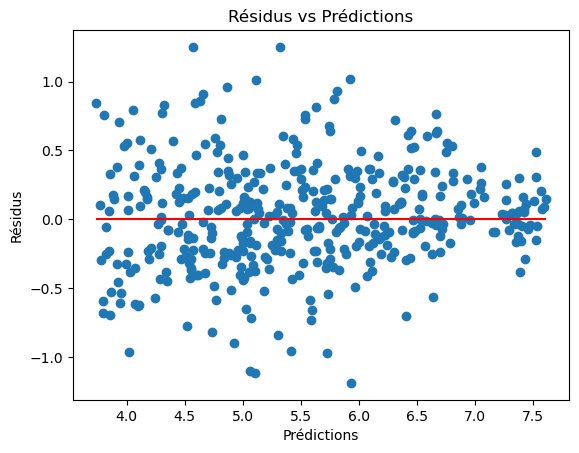

In [88]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Résidus vs Prédictions')
plt.show()

In [ ]:
# En analysant le graphique, on se rend compte que la dispersion temps à diminuer avec l'augmentation de Life Ladder (cible)
# Ainsi, il semble plus facile de prévoir un niveau élevé de life ladder.

In [101]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assume `residuals` are your residuals and `y_pred` are your predictions
# You need to add a constant term if you are using statsmodels for the independent variable
X = sm.add_constant(y_pred)

# The test returns a list of values, the second one is the p-value
bp_test = het_breuschpagan(residuals, X)
print('Breusch-Pagan p-value:', bp_test[1])


Breusch-Pagan p-value: 0.000293280566333213


In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_grid, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Scores RMSE de la validation croisée: {rmse_scores}")
print(f"Moyenne: {rmse_scores.mean()}")

Scores RMSE de la validation croisée: [0.4011733  0.36742073 0.37696577 0.36594431 0.36102847]
Moyenne: 0.3745065144803422


In [ ]:
Voici ce que les résultats indiquent :

Les scores RMSE individuels pour chaque fold varient de 0.361 à 0.401.
La moyenne des scores RMSE sur tous les folds est d'environ 0.375.
Le RMSE est une mesure de la quantité d'erreur dans les prédictions du modèle. Plus le RMSE est bas, mieux c'est, car cela signifie que les prédictions du modèle sont proches des valeurs réelles. Un RMSE de 0 signifierait des prédictions parfaites.

Concernant la dispersion des scores RMSE (de 0.361 à 0.401), on peut observer une certaine cohérence dans la performance du modèle, car les valeurs ne varient pas trop largement. Cela suggère que le modèle est assez stable et fournit une performance similaire sur différents sous-ensembles de données.

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=100, high=500),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(low=10, high=50),
}

rnd_search = RandomizedSearchCV(rf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x28ad476d0>,
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x28b8d0590>},
                   random_state=42, scoring='neg_mean_squared_error')

In [91]:
# Trouver les cas avec les plus grands résidus
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})
error_df = error_df.abs().sort_values(by='Residual', ascending=False)
print(error_df.head())


      Actual  Predicted  Residual
184    5.820   4.567527  1.252473
1904   6.568   5.318839  1.249161
555    4.741   5.930178  1.189178
254    3.993   5.107895  1.114895
1940   3.965   5.064114  1.099114


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Vérifiez que cette ligne utilise le bon modèle, ici best_grid est le modèle entraîné précédemment
y_pred_test = best_grid.predict(X_test)

# Calculer MSE, MAE, et R^2
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mse)

# Afficher les métriques
print(f"Erreur Quadratique Moyenne (MSE): {mse}")
print(f"Erreur Absolue Moyenne (MAE): {mae}")
print(f"Coefficient de Détermination (R^2): {r2}")
print(f"Erreur Quadratique Moyenne Racine (RMSE): {rmse}")

Erreur Quadratique Moyenne (MSE): 0.1459648499231719
Erreur Absolue Moyenne (MAE): 0.29250334184013116
Coefficient de Détermination (R^2): 0.8833612453021167
Erreur Quadratique Moyenne Racine (RMSE): 0.3820534647443626


In [ ]:
Erreur Quadratique Moyenne (MSE) : C'est la moyenne des carrés des écarts entre les valeurs prédites et les valeurs réelles. Plus ce nombre est petit, mieux c'est. Une MSE de 0.1459 indique que les erreurs de prédiction sont relativement faibles.

Erreur Absolue Moyenne (MAE) : C'est la moyenne des valeurs absolues des écarts entre les prédictions et les valeurs réelles. Un MAE de 0.2925 signifie que, en moyenne, vos prédictions s'écartent de 0.2925 unités de la valeur réelle.

Coefficient de Détermination (R^2) : Cette valeur indique la proportion de la variance de la variable dépendante qui est prévisible à partir des variables indépendantes. Une valeur de 0.8834 est assez élevée, suggérant que votre modèle explique environ 88.34% de la variabilité des données de réponse.

Erreur Quadratique Moyenne Racine (RMSE) : C'est la racine carrée de la MSE. Elle est dans les mêmes unités que la variable de réponse et peut être plus intuitive. Un RMSE de 0.3820 est cohérent avec la MSE et indique également une bonne performance du modèle.